Project name :  BIG MART DATA ANALYSIS

project Description: Here, we have data of BIG MART, in which we have data of their diffrent store, establishment year, sales, size, location, type, items.

project Goal: Our goal is to make predict model to predict sales on the base of given parametes

Importing Libraries and datasets

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
train=pd.read_csv("bigdatamart_Train.csv") 
new_data=pd.read_csv("bigdatamart_Test.csv")

In [116]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [117]:
new_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [118]:
print(train.shape)
print(new_data.shape)

(8523, 12)
(5681, 11)


In [119]:
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [120]:
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None


EDA 

*check numerical and catagorical columns

*null values find and remove

*outliers finding and removing

*co-relation checking

*dummy variable instead of catagorical 

*reduce dimension

*scaling the data

In [121]:
categorical_train=[j for j in train if train[j].dtype == 'object']
categorical_new_data =[k for k in new_data if new_data[k].dtype == 'object']

In [122]:
for i in categorical_train:
    columns = train[i].unique()
    print(i,columns)

Item_Identifier ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size ['Medium' nan 'High' 'Small']
Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [123]:
for col in categorical_new_data:
    columns2 = new_data[col].unique()
    print(i,columns2)

Outlet_Type ['FDW58' 'FDW14' 'NCN55' ... 'NCI29' 'FDP28' 'FDF04']
Outlet_Type ['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
Outlet_Type ['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']
Outlet_Type ['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']
Outlet_Type ['Medium' nan 'Small' 'High']
Outlet_Type ['Tier 1' 'Tier 2' 'Tier 3']
Outlet_Type ['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']


In [124]:
train.insert(loc=9,column='current_year',value=2021)
new_data.insert(loc=8,column='current_year',value=2021)

In [125]:
train['Outlet_age']=train['current_year']- train['Outlet_Establishment_Year']
new_data['Outlet_age']=new_data['current_year']- new_data['Outlet_Establishment_Year']

In [126]:
train=train.drop(['current_year','Outlet_Establishment_Year'],axis=1)
new_data=new_data.drop(['current_year','Outlet_Establishment_Year'],axis=1)

#here, i remove establishment year because i create new columns and get total age of outlet

In [127]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


Missing Values

In [128]:
print(train.isnull().sum())
print('-------------------------------------')
print(new_data.isnull().sum())

Item_Identifier            0
Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_age                 0
dtype: int64
-------------------------------------
Item_Identifier            0
Item_Weight              976
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             1606
Outlet_Location_Type       0
Outlet_Type                0
Outlet_age                 0
dtype: int64


In [129]:
## replacing the duplicate values in 'Item_Weight'
train['Item_Fat_Content']=train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = False)
new_data['Item_Fat_Content']=new_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = False) 

In [130]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


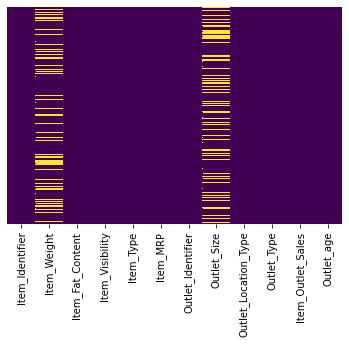

In [131]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

FROM heatment we can visulize that only two columns have null values and now we are going to handle that null values

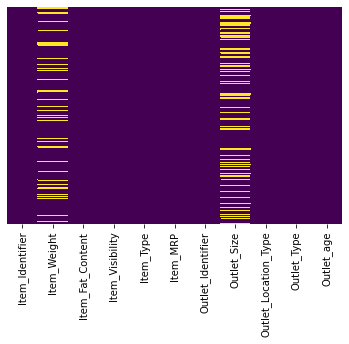

In [132]:
sns.heatmap(new_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## we have to check if the data is missing completely at random or not
 for data missing completely at random, there should be equal probability of missing values for every variable and  there should not be any relationship with other variables 
*  Here, we have 'Item_weight' and 'Outlet_type' which subjectively says that there might not be dependant on each other
*  Although it needs domain expert knowledge to make a note why the data is missing , in this case I went with basic subjective knowledge saying that there is no relation
* There any many imputation methods for no relation missing values such as mean , median, mode, random imputation , KNN etc..
* I went with imputation methods using statistics since and it worked as good as KNN 
* Compared to KNN , statistical methods are preferably choosable since they do not require more computation and time

In [133]:

## imputing missing values for categorical variable 'Outlet_Size'

print(train.Outlet_Size.value_counts())
print(new_data.Outlet_Size.value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


In [134]:
## imputing categorical variable with the most repeated

mode=train['Outlet_Size'].mode().values[0]
train['Outlet_Size']=train['Outlet_Size'].replace(np.nan,mode,inplace=False)
mode1=new_data['Outlet_Size'].mode().values[0]
new_data['Outlet_Size']=new_data['Outlet_Size'].replace(np.nan,mode,inplace=False)

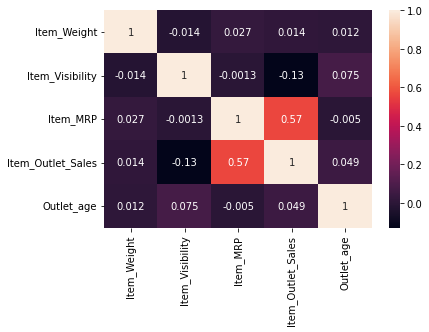

In [135]:
corr=train.iloc[:,1:].corr()
top_features=corr.index
sns.heatmap(train[top_features].corr(),annot=True)

In [136]:
## checking the correlation after imputation of categorical variable to make sure it is not correlating with any other
## Also we can clearly see that the only variable correlating high with sales is MRP .

In [137]:
median_train=train['Item_Weight'].median()
print(median_train)
median_new_data=new_data['Item_Weight'].median()
print(median_new_data)

12.6
12.5


In [138]:
def impute_nan(train,variable,median_train):
    train[variable+"_median"]=train[variable].fillna(median_train)
    train[variable+"_random"]=train[variable]
    random_sample=train[variable].dropna().sample(train[variable].isnull().sum(),random_state=0)
    random_sample.index=train[train[variable].isnull()].index
    train.loc[train[variable].isnull(),variable+'_random']=random_sample

In [139]:
impute_nan(train,'Item_Weight',median_train)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,Item_Weight_median,Item_Weight_random
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,23,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34,8.93,8.93


In [140]:
## imputed numerical variable with both median and random variable in  two different columns to compare

In [141]:
import matplotlib.pyplot as plt
%matplotlib inline

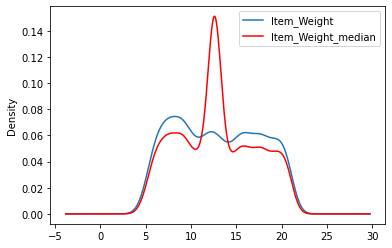

In [142]:
fig = plt.figure()
ax = fig.add_subplot(111)
train['Item_Weight'].plot(kind='kde', ax=ax)
train.Item_Weight_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [143]:
## we can observe that there is a deviation in the distribution which leads to outilers

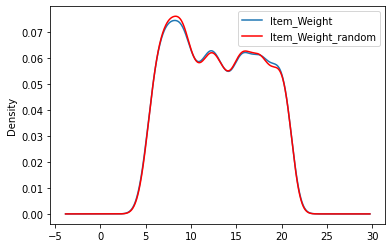

In [144]:
fig = plt.figure()
ax = fig.add_subplot(111)
train['Item_Weight'].plot(kind='kde', ax=ax)
train.Item_Weight_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [145]:
## clearly, random weight imputation is much closer to item weight distribution

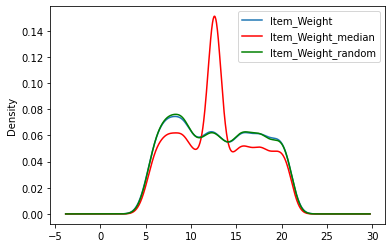

In [146]:
fig = plt.figure()
ax = fig.add_subplot(111)
train['Item_Weight'].plot(kind='kde', ax=ax)
train.Item_Weight_median.plot(kind='kde', ax=ax, color='red')
train.Item_Weight_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [147]:
## 'Item_weight' and 'Item_weight_random' are in the same distribution and hence we can drop the imputaion with median

In [148]:
def impute_nan(test,variable,median_new_data):
    new_data[variable+"_median"]=new_data[variable].fillna(median_new_data)
    new_data[variable+"_random"]=new_data[variable]
    random_sample=test[variable].dropna().sample(test[variable].isnull().sum(),random_state=0)
    random_sample.index=test[test[variable].isnull()].index
    new_data.loc[new_data[variable].isnull(),variable+'_random']=random_sample

In [149]:
impute_nan(new_data,'Item_Weight',median_new_data)
new_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_age,Item_Weight_median,Item_Weight_random
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,22,20.750,20.750
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1,14,8.300,8.300
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store,23,14.600,14.600
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1,14,7.315,7.315
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,36,12.500,15.100


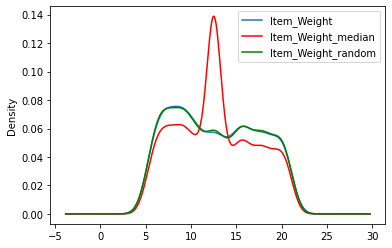

In [150]:
fig = plt.figure()
ax = fig.add_subplot(111)
new_data['Item_Weight'].plot(kind='kde', ax=ax)
new_data.Item_Weight_median.plot(kind='kde', ax=ax, color='red')
new_data.Item_Weight_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [151]:
## it worked the same for testing , dropping 'Item_weight_median'

In [152]:
train=train.drop(['Item_Weight_median','Item_Weight'],axis=1)
new_data=new_data.drop(['Item_Weight_median','Item_Weight'],axis=1)

Relation of every column with target variable (Analysing data)

In [153]:
# Initially, we check if the data is normally distributed or left/right skewed in order to avoid outlier

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


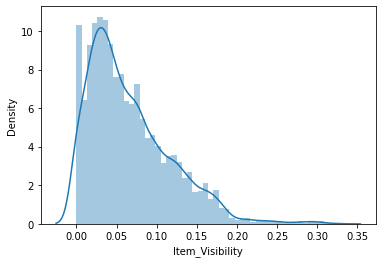

In [154]:
sns.distplot(train['Item_Visibility'])

* data is right skewed which shows that it is positively skewed
* Although the data is skewed and is touching the peak points, outlier removal might lead to loosing of sensitive information
* since this is a sales data , every information which increases/decreases the sales is equally important 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


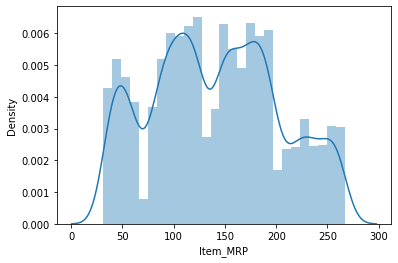

In [155]:
sns.distplot(train['Item_MRP'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


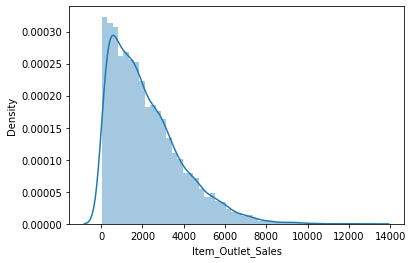

In [156]:
sns.distplot(train['Item_Outlet_Sales'])

In [157]:
## sales are positively skewed , also shows peakness

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


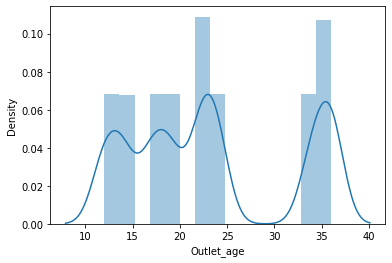

In [158]:
sns.distplot(train['Outlet_age'])

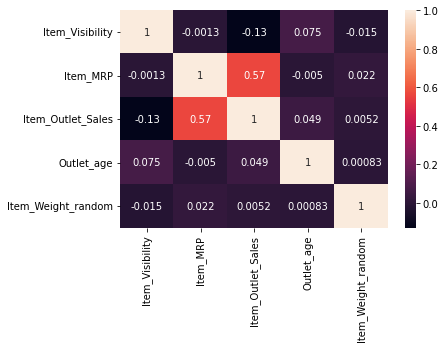

In [159]:
import seaborn as sns
import matplotlib as plt
corr=train.iloc[:,1:].corr()
top_features=corr.index
sns.heatmap(train[top_features].corr(),annot=True)

In [160]:
## in order to check relation between target variable, picking top correlated features with sales

AttributeError: ignored

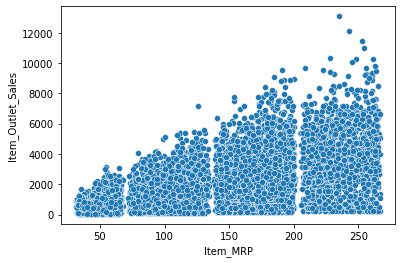

In [161]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=train)

plt.plot([69,69],[0,5000])
plt.plot([137,137],[0,5000])
plt.plot([203,203],[0,9000])

In [162]:
## as correlation said in the heatmap, as the mrp is increasing, sales are gradually increasing which shows good correlation

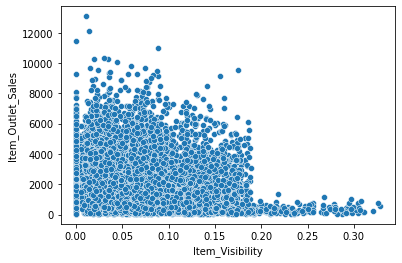

In [163]:
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train)

In [164]:
##Item_visibility does shows correlation in a negative direction

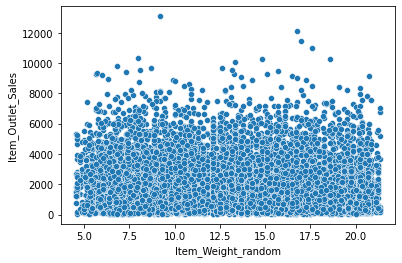

In [165]:
sns.scatterplot(x='Item_Weight_random',y='Item_Outlet_Sales',data=train)

In [166]:
## very less correlation

In [167]:
#ckecking possibilities to reduce dimensionality

In [168]:
## removing unnecessary columns based on subjective knowledge
train=train.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
new_data=new_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

handling categorical variables

In [169]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [170]:
## Item_type has anyway very less correlation with sales and it has too many categorical variables, we can decrease them into categories which can reduce the dimensionality
train['Item_Type']=train['Item_Type'].replace(['Fruits and Vegetables','Snack Foods','Household','Frozen Foods','Dairy','Canned','Baking Goods','Health and Hygiene','Soft Drinks','Meat','Breads','Hard Drinks','Starchy Foods','Breakfast','Seafood','Others'],['edible','edible','non-edible','edible','edible','edible','edible','non-edible','edible','edible','edible','edible','edible','edible','edible','non-edible'],inplace = False)
new_data['Item_Type']=new_data['Item_Type'].replace(['Fruits and Vegetables','Snack Foods','Household','Frozen Foods','Dairy','Canned','Baking Goods','Health and Hygiene','Soft Drinks','Meat','Breads','Hard Drinks','Starchy Foods','Breakfast','Seafood','Others'],['edible','edible','non-edible','edible','edible','edible','edible','non-edible','edible','edible','edible','edible','edible','edible','edible','non-edible'],inplace = False)

In [171]:
train['Item_Type'].value_counts()

edible        6924
non-edible    1599
Name: Item_Type, dtype: int64

In [172]:
new_data.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_age,Item_Weight_random
0,Low Fat,0.007565,edible,107.8622,Medium,Tier 1,Supermarket Type1,22,20.750
1,Regular,0.038428,edible,87.3198,Medium,Tier 2,Supermarket Type1,14,8.300
2,Low Fat,0.099575,non-edible,241.7538,Medium,Tier 3,Grocery Store,23,14.600
3,Low Fat,0.015388,edible,155.0340,Medium,Tier 2,Supermarket Type1,14,7.315
4,Regular,0.118599,edible,234.2300,Medium,Tier 3,Supermarket Type3,36,15.100


In [173]:
train.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,Item_Weight_random
0,Low Fat,0.016047,edible,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,22,9.30
1,Regular,0.019278,edible,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,12,5.92
2,Low Fat,0.016760,edible,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,22,17.50
3,Regular,0.000000,edible,182.0950,Medium,Tier 3,Grocery Store,732.3800,23,19.20
4,Low Fat,0.000000,non-edible,53.8614,High,Tier 3,Supermarket Type1,994.7052,34,8.93


In [174]:
X=train[['Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_age','Item_Weight_random']]
y=train['Item_Outlet_Sales']

In [175]:
categorical_columns = X.describe(include='object').columns.to_list()
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [176]:
X= pd.get_dummies(X,categorical_columns)

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [178]:
X.head()

,Item_Visibility,Item_MRP,Outlet_age,Item_Weight_random,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_edible,Item_Type_non-edible,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.016047,249.8092,22,9.30,1,0,1,0,0,1,0,1,0,0,0,1,0,0
1,0.019278,48.2692,12,5.92,0,1,1,0,0,1,0,0,0,1,0,0,1,0
2,0.016760,141.6180,22,17.50,1,0,1,0,0,1,0,1,0,0,0,1,0,0
3,0.000000,182.0950,23,19.20,0,1,1,0,0,1,0,0,0,1,1,0,0,0
4,0.000000,53.8614,34,8.93,1,0,0,1,1,0,0,0,0,1,0,1,0,0


In [179]:
categorical_columns2 = new_data.describe(include='object').columns.to_list()
categorical_columns2

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [180]:
new_data= pd.get_dummies(new_data,categorical_columns2)

In [181]:
new_data.head()

,Item_Visibility,Item_MRP,Outlet_age,Item_Weight_random,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_edible,Item_Type_non-edible,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.007565,107.8622,22,20.750,1,0,1,0,0,1,0,1,0,0,0,1,0,0
1,0.038428,87.3198,14,8.300,0,1,1,0,0,1,0,0,1,0,0,1,0,0
2,0.099575,241.7538,23,14.600,1,0,0,1,0,1,0,0,0,1,1,0,0,0
3,0.015388,155.0340,14,7.315,1,0,1,0,0,1,0,0,1,0,0,1,0,0
4,0.118599,234.2300,36,15.100,0,1,1,0,0,1,0,0,0,1,0,0,0,1


FEATURE SELECTION

In [182]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [183]:
rank=model.feature_importances_

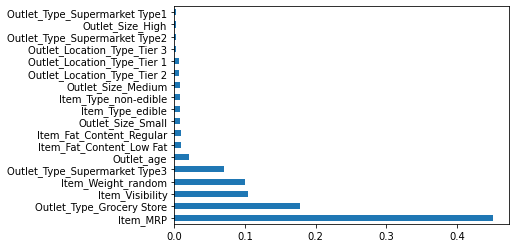

In [184]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(18).plot(kind='barh')
plt.show()

In [185]:
#Dropping unnecessary features that have below 0% can be done but in this case, since they are giving 0.002% information , i did not want to loose any minute information as well. 
#therefore no dropping is perfomed

In [186]:
X_train.shape

(6818, 18)

In [187]:
imp_fea=feat_importances.nlargest(18)
imp_fea

Item_MRP                         0.451455
Outlet_Type_Grocery Store        0.177682
Item_Visibility                  0.104254
Item_Weight_random               0.100219
Outlet_Type_Supermarket Type3    0.070595
Outlet_age                       0.020501
Item_Fat_Content_Low Fat         0.009937
Item_Fat_Content_Regular         0.009920
Outlet_Size_Small                0.008355
Item_Type_edible                 0.007977
Item_Type_non-edible             0.007917
Outlet_Size_Medium               0.007838
Outlet_Location_Type_Tier 2      0.006974
Outlet_Location_Type_Tier 1      0.006830
Outlet_Location_Type_Tier 3      0.002671
Outlet_Type_Supermarket Type2    0.002405
Outlet_Size_High                 0.002280
Outlet_Type_Supermarket Type1    0.002189
dtype: float64

SCALING

In [188]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [189]:
X_train=sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X_test.columns)

X_test=sc.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X_train.columns)

In [190]:
X_train.head()

,Item_Visibility,Item_MRP,Outlet_age,Item_Weight_random,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_edible,Item_Type_non-edible,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.600703,0.470709,-0.136169,-0.724616,-1.344216,1.344216,0.483533,-0.483533,-0.349985,0.797369,-0.622920,1.623061,-0.699265,-0.810472,-0.379673,0.73042,-0.352093,-0.354457
1,-0.362159,0.457877,-0.493521,1.111785,0.743928,-0.743928,-2.068113,2.068113,-0.349985,0.797369,-0.622920,-0.616120,1.430073,-0.810472,-0.379673,0.73042,-0.352093,-0.354457
2,0.194933,-0.482625,0.102066,1.025366,-1.344216,1.344216,0.483533,-0.483533,-0.349985,-1.254125,1.605343,1.623061,-0.699265,-0.810472,-0.379673,0.73042,-0.352093,-0.354457
3,-0.704944,-1.603553,-0.493521,-0.978471,0.743928,-0.743928,0.483533,-0.483533,-0.349985,0.797369,-0.622920,-0.616120,1.430073,-0.810472,-0.379673,0.73042,-0.352093,-0.354457
4,1.383177,0.218375,0.102066,-0.000858,0.743928,-0.743928,0.483533,-0.483533,-0.349985,-1.254125,1.605343,1.623061,-0.699265,-0.810472,-0.379673,0.73042,-0.352093,-0.354457


In [191]:
new_data=sc.fit_transform(new_data)
new_data=pd.DataFrame(new_data,columns=X_test.columns)

MODEL IMPLEMENTATION****

LINEAR REGRESSION

In [192]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression(normalize=True)
model1.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [193]:
y_pred_train_model1 = model1.predict(X_train)
from sklearn.metrics import r2_score
R2 = r2_score(y_train,y_pred_train_model1)
print("r2 score is :",R2)

r2 score is : 0.5585188091252584


In [194]:
y_pred_test_model1 = model1.predict(X_test)
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred_test_model1)
print("r2 score is :",R2)

r2 score is : 0.5811664141325197


In [195]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train,y_pred_train_model1))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train_model1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_model1)))

MAE: 848.0295677416265
MSE: 1305923.5408108472
RMSE: 1142.7701172199277


In [196]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_test_model1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_model1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_model1)))

MAE: 790.7853972677088
MSE: 1138377.1492815563
RMSE: 1066.9475850675872


GradientBoostingRegressor

In [197]:
from sklearn.ensemble import GradientBoostingRegressor
model3= GradientBoostingRegressor()

In [198]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [199]:
## implementing randomised search cv to get the best parameters

In [200]:
params = {'learning_rate': sp_randFloat(),'subsample'    : sp_randFloat(),'n_estimators' : sp_randInt(100, 1000),'max_depth'    : sp_randInt(4, 10)}

In [201]:
from sklearn.model_selection import RandomizedSearchCV
randm_search = RandomizedSearchCV(estimator=model3, param_distributions = params,
                               cv = 2, n_iter = 10, n_jobs=-1)
randm_search.fit(X_train, y_train)

RandomizedSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb86edbbe50>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb86edc2e50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb86ed5ca90>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb86edbbe90>})

In [202]:
print("Best estimators",randm_search.best_estimator_)
print("Best score",randm_search.best_score_)
print("Best params",randm_search.best_params_)

Best estimators GradientBoostingRegressor(learning_rate=0.16984830007405938, max_depth=5,
                          n_estimators=282, subsample=0.5929231737786759)
Best score 0.4536434775590657
Best params {'learning_rate': 0.16984830007405938, 'max_depth': 5, 'n_estimators': 282, 'subsample': 0.5929231737786759}


In [203]:
model3=  GradientBoostingRegressor(learning_rate=0.0154291815347819, max_depth=9,
                          n_estimators=165, subsample=0.11550214721325958)

In [204]:
model3.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.0154291815347819, max_depth=9,
                          n_estimators=165, subsample=0.11550214721325958)

In [205]:
y_pred_train_model3 = model3.predict(X_train)
from sklearn.metrics import r2_score
R2 = r2_score(y_train,y_pred_train_model3)
print("r2 score is :",R2)

r2 score is : 0.6759416759130483


In [206]:
y_pred_test_model3 = model3.predict(X_test)
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred_test_model3)
print("r2 score is :",R2)

r2 score is : 0.5931552136844341


In [207]:
print('MAE:', metrics.mean_absolute_error(y_train,y_pred_train_model3))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train_model3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_model3)))

MAE: 706.9850897970463
MSE: 958580.8020095956
RMSE: 979.0713978099838


In [208]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_test_model3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_model3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_model3)))

MAE: 749.17469608315
MSE: 1105791.9509647847
RMSE: 1051.566427271613


FINAL RESULTS FOR TRAINING and TESTING DATA

LINEAR REGRESSION:

training:
* r2 score is : 0.5584145136909324
* MAE: 848.1920611339497
* MSE: 1306232.051944958
* RMSE: 1142.9050931485772
 
testing
* r2 score is : 0.5809991170997183
* MAE: 791.1141359649645
* MSE: 1138831.8576089442
* RMSE: 1067.1606522023496

GRADIENT BOOSTING REGRESSOR:
training:
* r2 score is : 0.6737769589742313
* MAE: 709.2194716729872
* MSE: 964984.1434611119
* RMSE: 982.3360644204772

testing:
* r2 score is : 0.6013689251080387
* MAE: 744.5459877561524
* MSE: 1083467.3291795994
* RMSE: 1040.8973672651878

In [210]:
import pickle
output=open("bigmartsales.pickle","wb")
pickle.dump(model3,output)

In [211]:
sales_pred=open("bigmartsales.pickle","rb")
emp=pickle.load(sales_pred)


In [212]:
pred=model3.predict(new_data)
pred

array([1767.15667877, 1377.94743757,  629.6094059 , ..., 1968.66757768,
       3577.81266814, 1353.68054541])

In [213]:
pred

array([1767.15667877, 1377.94743757,  629.6094059 , ..., 1968.66757768,
       3577.81266814, 1353.68054541])

In [214]:
new_data['Outlet_Sales']=pred

In [215]:
new_data.head()

,Item_Visibility,Item_MRP,Outlet_age,Item_Weight_random,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_edible,Item_Type_non-edible,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Sales
0,-1.134077,-0.536555,-0.139891,1.723127,0.740811,-0.740811,0.486429,-0.486429,-0.350325,0.798824,-0.623969,1.602644,-0.696584,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,1767.156679
1,-0.531850,-0.868937,-1.095512,-0.943601,-1.349873,1.349873,0.486429,-0.486429,-0.350325,0.798824,-0.623969,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,1377.947438
2,0.661316,1.629848,-0.020438,0.405827,0.740811,-0.740811,-2.055799,2.055799,-0.350325,0.798824,-0.623969,-0.623969,-0.696584,1.242623,2.620767,-1.375706,-0.349374,-0.351274,629.609406
3,-0.981416,0.226697,-1.095512,-1.154584,0.740811,-0.740811,0.486429,-0.486429,-0.350325,0.798824,-0.623969,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,2295.639060
4,1.032540,1.508110,1.532446,0.512925,-1.349873,1.349873,0.486429,-0.486429,-0.350325,0.798824,-0.623969,-0.623969,-0.696584,1.242623,-0.381568,-1.375706,-0.349374,2.846782,5629.727828


In [216]:
## we have predicted sales using GRADIENT BOOST REGRESSOR by loading it into pickle and predicting the new data
## the new_data 'Outlet_Sales' is now loaded into the new_data file